In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = ".."

## Topologies

In [ ]:
def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";")
    display(HTML(df.to_html()))

read_topology("multi")
read_topology("single")

## Traces

In [16]:
# A trace is a measurement of a datacenter, over an amount of time (e.g., we saw an activity over some time). The trace is a more detailed summary of the metatrace

df_trace = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/trace.parquet")
# df_trace.head()
df_trace[df_trace["timestamp"] == "2013-08-12 13:50:46+00:00"]

,id,timestamp,duration,cpu_count,cpu_usage
3,1019,2013-08-12 14:00:46+00:00,300000,1,11.703998
11257,1026,2013-08-12 14:00:46+00:00,300000,1,23.407998
34043,1138,2013-08-12 14:00:46+00:00,300000,1,19.066662
41351,1147,2013-08-12 14:00:46+00:00,300000,1,10.399996
47518,1152,2013-08-12 14:00:46+00:00,300000,1,11.703998
53664,116,2013-08-12 14:00:46+00:00,300000,4,148.250637
61560,141,2013-08-12 14:00:46+00:00,1200000,2,58.519986
66384,190,2013-08-12 14:00:46+00:00,300000,8,7767.064599
73304,205,2013-08-12 14:00:46+00:00,300000,8,8259.332123
79987,242,2013-08-12 14:00:46+00:00,1500000,8,71.066656


In [4]:
# In the metatrace, it is a summary of the tasks / jobs.

df_meta = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/meta.parquet")
df_meta.head()

,id,start_time,stop_time,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2926.000135,181352
1,1023,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999560,260096
2,1026,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999717,249972
3,1052,2013-08-29 14:38:12+00:00,2013-09-05 07:09:07+00:00,1,2926.000107,131245
4,1073,2013-08-21 11:07:12+00:00,2013-09-11 13:39:58+00:00,1,2599.999649,179306


# Lets run this in OpenDC!

## Resulting Files

In [17]:
output_folder = f"{base_folder}/output"
workload = "workload=bitbrains-small"
seed = "seed=0"

df_host_single = pd.read_parquet(f"{output_folder}/host/topology=single/{workload}/{seed}/data.parquet")
df_host_multi = pd.read_parquet(f"{output_folder}/host/topology=multi/{workload}/{seed}/data.parquet")

df_server_single = pd.read_parquet(f"{output_folder}/server/topology=single/{workload}/{seed}/data.parquet")
df_server_multi = pd.read_parquet(f"{output_folder}/server/topology=multi/{workload}/{seed}/data.parquet")

df_service_single = pd.read_parquet(f"{output_folder}/service/topology=single/{workload}/{seed}/data.parquet")
df_service_multi = pd.read_parquet(f"{output_folder}/service/topology=multi/{workload}/{seed}/data.parquet")

def add_absolute_timestamp(df, start_dt):
    df["absolute_timestamp"] = start_dt + (df["timestamp"] - df["timestamp"].min())

add_absolute_timestamp(df_host_single, df_meta["start_time"].min())
add_absolute_timestamp(df_host_single, df_meta["start_time"].min())

add_absolute_timestamp(df_server_single, df_meta["start_time"].min())
add_absolute_timestamp(df_server_multi, df_meta["start_time"].min())

add_absolute_timestamp(df_service_single, df_meta["start_time"].min())
add_absolute_timestamp(df_service_multi, df_meta["start_time"].min())

In [18]:
len(df_service_single)

25922

In [21]:
df_service_single.head()

,timestamp,hosts_up,hosts_down,servers_pending,servers_active,attempts_success,attempts_failure,attempts_error,absolute_timestamp
0,1970-01-01 00:05:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:35:46+00:00
1,1970-01-01 00:10:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:40:46+00:00
2,1970-01-01 00:15:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:45:46+00:00
3,1970-01-01 00:20:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:50:46+00:00
4,1970-01-01 00:25:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:55:46+00:00


In [22]:
df_server_single.head()

,timestamp,server_id,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,absolute_timestamp
0,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x06\xc4]\x1...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,181,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
1,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x1b9\x89jQ\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,260,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
2,1970-01-01 00:05:00+00:00,"b'\x00\x00\x00\x00\x00\x00\x00\x00,\x82\x9a\xb...",b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,250,1,25600.0,2,2622,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
3,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00>\xe5x\x90A\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,125,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
4,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00e~\xec\xdd<\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,157,1,25600.0,2,2951,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00


<Axes: >

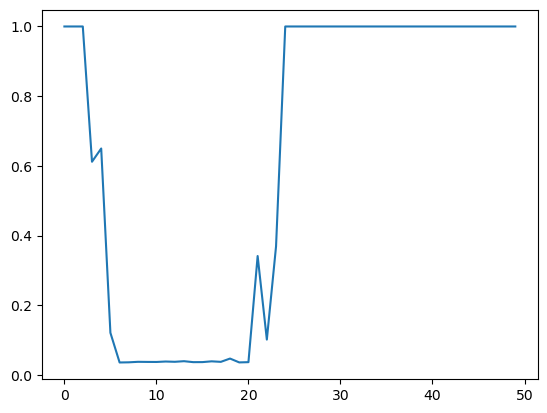

In [41]:
df_host_single.cpu_utilization
# array of 50 numbers
# arrayNumbers = np.square(np.arange(50))
# plt.plot(arrayNumbers)
# show the graph with matplotlib
df_host_single.cpu_utilization[:50].plot()

In [28]:
df_host_multi.head()

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,b'\xf8\x8b\xb8\xa8rL\x81\xec\x00\x00\x00\x00\x...,8,64000,0,5,0,0,23440.0,10988.033203,10988.033203,0.468773,1125,1274,0,0,81094.853325,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:05:00+00:00,b'\x1b9\x89jQ\xa8t\x9b\x00\x00\x00\x00\x00\x00...,8,64000,0,5,0,0,23440.0,641.603821,641.603821,0.027372,65,2334,0,0,61231.893844,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:05:00+00:00,b'\xc5\x84\x13:\xc9\x16\xab<\x00\x00\x00\x00\x...,16,128000,0,5,0,0,51200.0,10547.469727,10547.469727,0.206005,988,3811,0,0,69270.356164,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:05:00+00:00,b'S\xcb\x9f\x0ct~\xa2\xea\x00\x00\x00\x00\x00\...,8,64000,0,5,0,0,23440.0,351.659912,351.659912,0.015003,36,2363,0,0,60675.262769,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:05:00+00:00,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,32,256000,0,5,0,0,102400.0,2214.168945,2214.168945,0.021623,207,9392,0,0,60973.170219,300000,0,1970-01-01 00:00:00+00:00


In [102]:
set(d1) == set(d2)

True

## Power Usage

In [29]:
print(f"single topology:  {df_host_single.power_total.sum()}")
print(f"multi topology:   {df_host_multi.power_total.sum()}")

single topology:  2227253755.2781296
multi topology:   5864872551.731657


## CPU usage

In [32]:
print(f"single topology:  {df_host_single.cpu_usage.mean()}")
print(f"multi topology:   {df_host_multi.cpu_usage.mean()}")

single topology:  14747.037477544056
multi topology:   8753.1730739572


## CPU utilization

In [31]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

single topology:  0.5760561514665646
multi topology:   0.3425398748402685


## Plotting Results

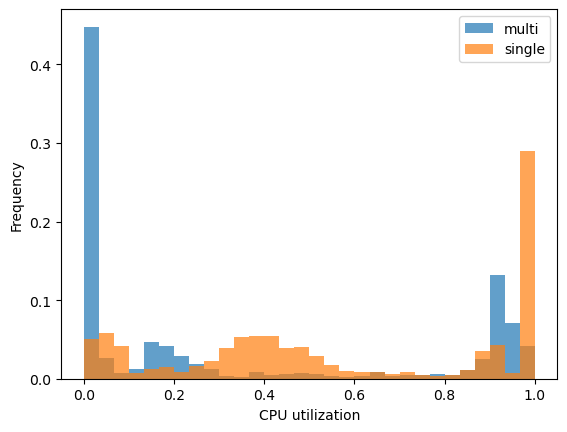

In [33]:
data = df_host_multi.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="multi", bins=30)


data = df_host_single.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="single", bins=30)

plt.xlabel("CPU utilization")
plt.ylabel("Frequency")
plt.legend()
plt.show()

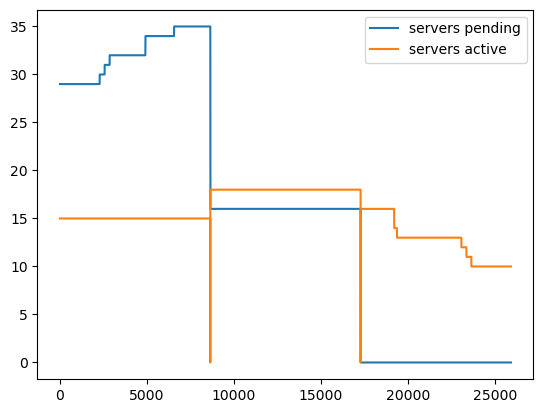

In [34]:
import matplotlib.pyplot as plt

plt.plot(df_service_single.servers_pending, label="servers pending")
plt.plot(df_service_single.servers_active, label="servers active")

plt.legend()

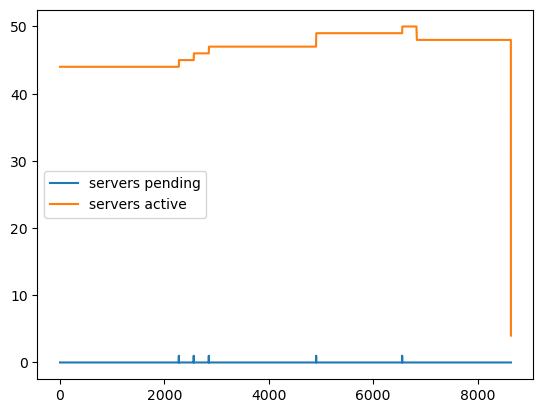

In [35]:
import matplotlib.pyplot as plt

plt.plot(df_service_multi.servers_pending, label="servers pending")
plt.plot(df_service_multi.servers_active, label="servers active")

plt.legend()

In [156]:
df_server_single.head()

,timestamp,server_id,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,absolute_timestamp
0,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x06\xc4]\x1...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,181,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
1,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00\x1b9\x89jQ\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,260,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
2,1970-01-01 00:05:00+00:00,"b'\x00\x00\x00\x00\x00\x00\x00\x00,\x82\x9a\xb...",b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,250,1,25600.0,2,2622,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
3,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00>\xe5x\x90A\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,125,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
4,1970-01-01 00:05:00+00:00,b'\x00\x00\x00\x00\x00\x00\x00\x00e~\xec\xdd<\...,b'\xe2 \xa89{\x1d\xcd\xaf\x00\x00\x00\x00\x00\...,157,1,25600.0,2,2951,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00


In [37]:
utilization = df_host_single.cpu_utilization.to_numpy()

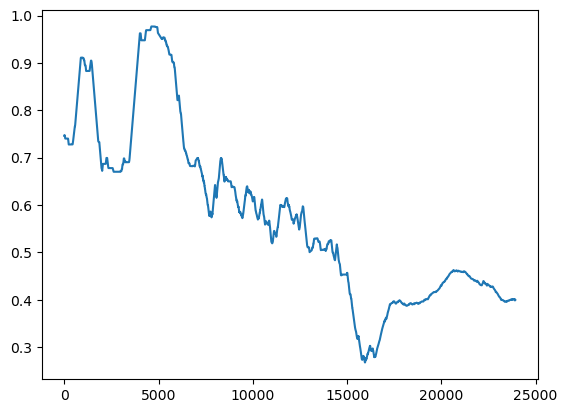

In [38]:
window = 2000
avg_utilization = []

for ind in range(len(utilization) - window + 1):
    avg_utilization.append(np.mean(utilization[ind:ind+window]))

plt.plot(avg_utilization)

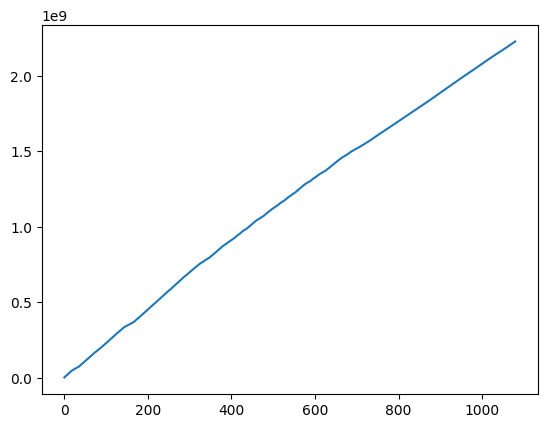

In [129]:
sum_util = []

last_util = 0
for util in utilization:
    sum_util.append(util + last_util)
    last_util = sum_util[-1]

plt.plot(sum_util)

In [ ]:
output_file = "../Python_scripts/meta_small.parquet"
output_file_path = Path(output_file)

df_meta_new.to_parquet(output_file_path, index=False)

output_file = "../Python_scripts/trace_small.parquet"
output_file_path = Path(output_file)
df_trace_new.to_parquet(output_file_path, index=False)
